In [330]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import altair as alt
from altair_saver import save

articleDetails = pd.read_pickle('article_details.pkl')

In [331]:
# Remove article posted on 2015-01-03, because it has no details about vistors/times/views
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2015-01-03"].index[0]])
# Remove article posted with the title of "Annual Seven-Up"
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Title'] == "Annual Seven-Up"].index[0]])
# Remove article posted on 2022-03-19, because it has no details about visitors/times/views
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2022-03-19"].index[0]])

In [332]:
# Get visitor information: visitor count, visit count, page view count
def getVisitorNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("visitors", 1)[0])
    if pre_split_size != post_split_size:
        visitors = int(re.search(r'\d+', string.split("visitors", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        visitors = int(0)
    return visitors

def getVistTimesNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("times", 1)[0])
    if pre_split_size != post_split_size:
        visits = int(re.search(r'\d+', string.split("times", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        pre_split_size = len(string)
        post_split_size = len(string.split("visits", 1)[0])
        if pre_split_size != post_split_size:
            visits = int(re.search(r'\d+', string.split("visits", 1)[0].replace(",", "")[::-1]).group()[::-1])
        else:
            visits = int(0)
    return visits

def getPageViewNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("pages", 1)[0])
    if pre_split_size != post_split_size:
        visits = int(re.search(r'\d+', string.split("pages", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        pre_split_size = len(string)
        post_split_size = len(string.split("pageviews", 1)[0])
        if pre_split_size != post_split_size:
            visits = int(re.search(r'\d+', string.split("pageviews", 1)[0].replace(",", "")[::-1]).group()[::-1])
        else:
            visits = int(0)
    return visits

# Average weekly increase
def averageIncrease(df, col_name, int_in):
    # Create array of deltas. Replace nan and negative values with zero
    a = np.maximum(df[col_name] - df[col_name].shift(), 0).replace(np.nan, 0)
    # Count non-zero values
    count = np.count_nonzero(a)

    if count == 0:
        # If only zero values… there is no increase
        return 0
    else:
        if int_in == True:
            return int(np.sum(a) / count)
        elif int_in == False:
            return np.sum(a) / count
        else:
            print("Boolean value must be entered for whether the return should be an integer or not.")


def getVisitsPerVisitor(visits, visitors):
    return (visits / visitors)

def getPageViewsPerVisits(page_views, visits):
    return (page_views / visits)

def getPageViewsPerVisitor(page_views, visitor):
    return (page_views / visitor)

In [333]:
articleDetails['Visitors'] = articleDetails.apply(lambda row : getVisitorNumbers(row['Article Details']), axis = 1)
articleDetails['Visits'] = articleDetails.apply(lambda row : getVistTimesNumbers(row['Article Details']), axis = 1)
articleDetails['Page Views'] = articleDetails.apply(lambda row : getPageViewNumbers(row['Article Details']), axis = 1)

# Remove article posted on 2010-11-06, because it has no details about visitors
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2010-11-06"].index[0]])

articleDetails['Visits per Visitor'] = articleDetails.apply(lambda row : getVisitsPerVisitor(row['Visits'], row['Visitors']), axis = 1)
articleDetails['Page Views per Visit'] = articleDetails.apply(lambda row : getPageViewsPerVisits(row['Page Views'], row['Visits']), axis = 1)
articleDetails['Page Views per Visitor'] = articleDetails.apply(lambda row : getPageViewsPerVisitor(row['Page Views'], row['Visitors']), axis = 1)

# Visitors

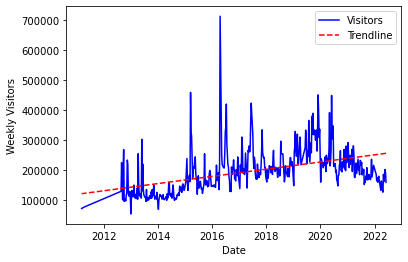

In [334]:
plt.plot(articleDetails['Date'], articleDetails['Visitors'], color='blue', label="Visitors")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visitors'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visitors")

plt.legend()
#plt.show()
plt.savefig('images/visitors.png',bbox_inches='tight')

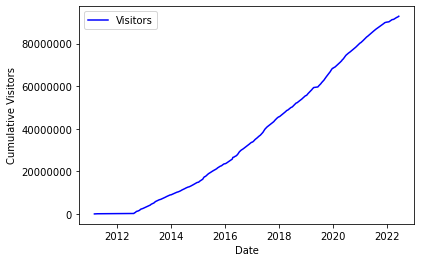

In [335]:
plt.plot(articleDetails['Date'], articleDetails[::-1].cumsum()['Visitors'][::-1], color='blue', label="Visitors")

plt.xlabel("Date")
plt.ylabel("Cumulative Visitors")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/cumulative_visitors.png',bbox_inches='tight')

# Visits

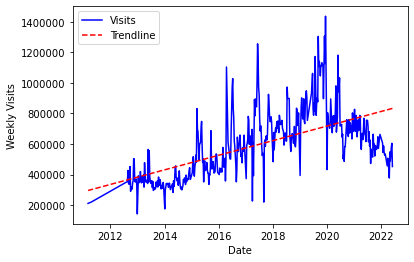

In [336]:
plt.plot(articleDetails['Date'], articleDetails['Visits'], color='blue', label="Visits")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visits'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visits")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/visits.png',bbox_inches='tight')

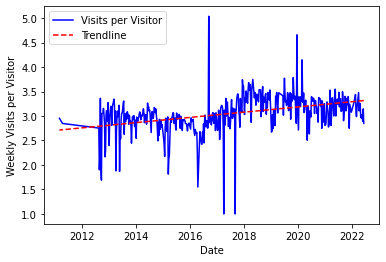

In [337]:
plt.plot(articleDetails['Date'], articleDetails['Visits per Visitor'], color='blue', label="Visits per Visitor")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visits per Visitor'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visits per Visitor")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.legend()
#plt.show()
plt.savefig('images/visits_per_visitor.png',bbox_inches='tight')

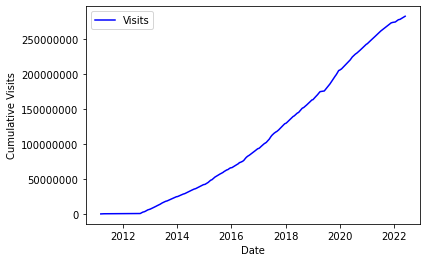

In [338]:
plt.plot(articleDetails['Date'], articleDetails[::-1].cumsum()['Visits'][::-1], color='blue', label="Visits")

plt.xlabel("Date")
plt.ylabel("Cumulative Visits")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/cumulative_visits.png',bbox_inches='tight')

# Page Views

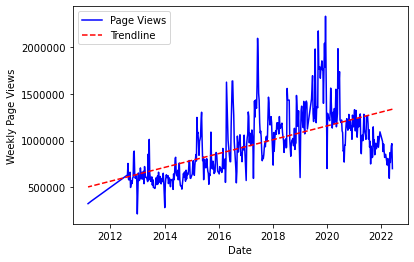

In [339]:
plt.plot(articleDetails['Date'], articleDetails['Page Views'], color='blue', label="Page Views")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Page Views'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Page Views")

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/page_views.png',bbox_inches='tight')

/tmp/ipykernel_46468/3199983460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_limited['Date_num_new'] = date_limited['Date'].map(datetime.date.toordinal)


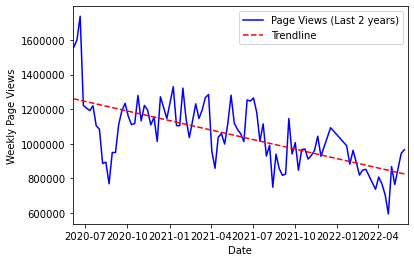

In [340]:
start_date = articleDetails['Date'][0].to_pydatetime() - relativedelta(years=2)
end_date = articleDetails['Date'][0].to_pydatetime()

date_limited = articleDetails[(articleDetails['Date'] > start_date) & (articleDetails['Date'] < end_date)]

plt.plot(date_limited['Date'], date_limited['Page Views'], color='blue', label="Page Views (Last 2 years)")

# To perform the linear regression we need the dates to be numeric
date_limited['Date_num_new'] = date_limited['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(date_limited['Date_num_new'], date_limited['Page Views'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(date_limited['Date'], p(date_limited['Date_num_new']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Page Views")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlim([start_date, end_date])

plt.legend()
#plt.show()
plt.savefig('images/page_views_last_two_years.png',bbox_inches='tight')

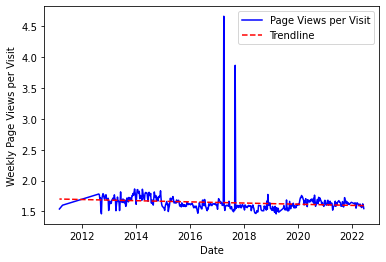

In [341]:
plt.plot(articleDetails['Date'], articleDetails['Page Views per Visit'], color='blue', label="Page Views per Visit")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Page Views per Visit'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Page Views per Visit")

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.legend()
#plt.show()
plt.savefig('images/page_views_per_visit.png',bbox_inches='tight')

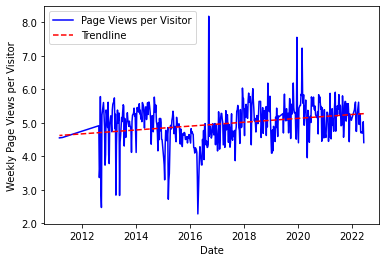

In [342]:
plt.plot(articleDetails['Date'], articleDetails['Page Views per Visitor'], color='blue', label="Page Views per Visitor")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Page Views per Visitor'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Page Views per Visitor")

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.legend()
#plt.show()
plt.savefig('images/page_views_per_visitor.png',bbox_inches='tight')

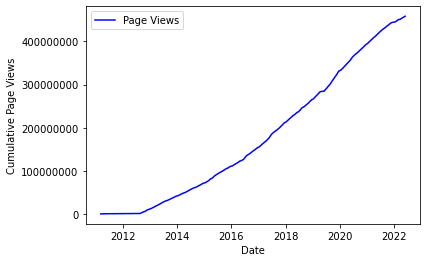

In [343]:
plt.plot(articleDetails['Date'], articleDetails[::-1].cumsum()['Page Views'][::-1], color='blue', label="Page Views")

plt.xlabel("Date")
plt.ylabel("Cumulative Page Views")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/cumulative_page_views.png',bbox_inches='tight')

# Title

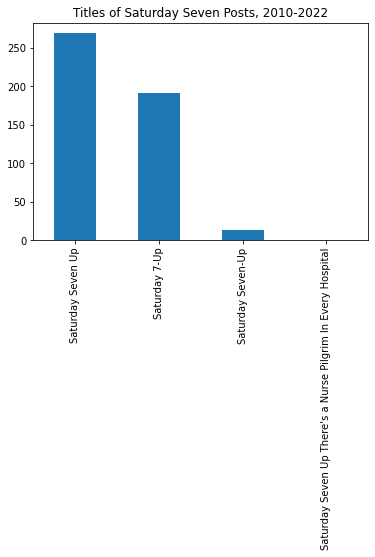

In [345]:
title_counts = articleDetails['Title'].value_counts()

# create the bar chart
ax = title_counts.plot.bar()
# set the title
ax.set_title("Titles of Saturday Seven Posts, 2010-2022")

#plt.show()
plt.savefig('images/titles.png',bbox_inches='tight')

In [346]:
startDF = articleDetails[::-1]['Date'].to_numpy()
startDate = []
endDate = []
for i in range(0, len(startDF)):
    startDate.append((pd.to_datetime(startDF[i]) - relativedelta(weeks=1)).to_datetime64())
    endDate.append(startDF[i])
title = articleDetails[::-1]['Title'].to_numpy()

alt.renderers.enable('jupyterlab')

data = pd.DataFrame()
data['from'] = startDate
data['to'] = endDate
data['Title'] = title

timeline = alt.Chart(data).mark_bar().encode(
    x=alt.X('from', axis=alt.Axis(title="")),
    x2='to',
    y='Title',
    color=alt.Color('Title', scale=alt.Scale(scheme='dark2'))
)

save(timeline, "images/titles_timeline.png")

# Post Time

In [349]:
articleDetails.head()

,Date,Link,Title,Article Details,Post Time,List Links,Number of Links,Visitors,Visits,Page Views,Visits per Visitor,Page Views per Visit,Page Views per Visitor,Date_num
0,2022-06-04,https://order-order.com/2022/06/04/saturday-7-...,Saturday 7-Up,"This week 158,742 visitors visited 452,385 tim...",07:35,[EXCLUSIVE: Yvette Cooper’s Son Led Trans Righ...,7,158742,452385,699803,2.849813,1.546919,4.408430,738310
1,2022-05-28,https://order-order.com/2022/05/28/saturday-7-...,Saturday 7-Up,"This week 192,138 visitors visited 604,322 tim...",07:30,[Jess Phillips Investigation Concludes Multipl...,7,192138,604322,966584,3.145250,1.599452,5.030676,738303
2,2022-05-21,https://order-order.com/2022/05/21/saturday-7-...,Saturday 7-Up,"This week 201,390 visitors visited 582,067 tim...",07:30,[Andrew Rosindell’s Office Not Answering Queri...,7,201390,582067,944991,2.890248,1.623509,4.692343,738296
3,2022-05-07,https://order-order.com/2022/05/07/saturday-7-...,Saturday 7-Up,"This week 161,673 visitors visited 489,154 tim...",07:30,[LibDem Candidate’s Pornstar Sideline Revealed...,7,161673,489154,765033,3.025576,1.563992,4.731978,738282
4,2022-04-30,https://order-order.com/2022/04/30/saturday-7-...,Saturday 7-Up,"This week 185,091 visitors visited 548,002 tim...",07:30,"[Flashback: What They Said At the Time, READ I...",7,185091,548002,868770,2.960717,1.585341,4.693745,738275


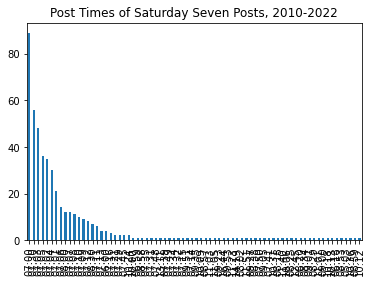

In [351]:
post_time_counts = articleDetails['Post Time'].value_counts()

# create the bar chart
ax = post_time_counts.plot.bar()
# set the title
ax.set_title("Post Times of Saturday Seven Posts, 2010-2022")

#plt.show()
plt.savefig('images/post_times.png',bbox_inches='tight')

# Featured Articles

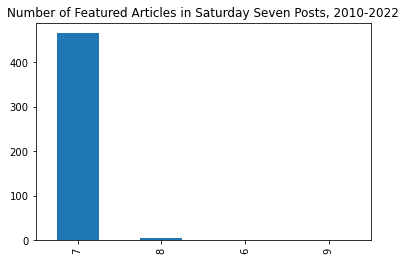

In [352]:
links_counts = articleDetails['Number of Links'].value_counts()

# create the bar chart
ax = links_counts.plot.bar()
# set the title
ax.set_title("Number of Featured Articles in Saturday Seven Posts, 2010-2022")

#plt.show()
plt.savefig('images/num_featured_articles.png',bbox_inches='tight')

In [359]:
text_lists = articleDetails['List Links'].values 
text = ""
for i in range(0, len(text_lists)):
    for j in range(0, len(text_lists[i])):
        text = text + " " + text_lists[i][j]

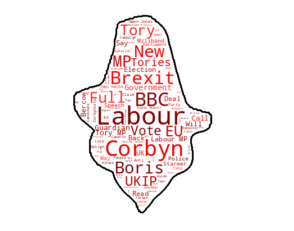

In [381]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = "images"

# read the mask image
guido_mask = np.array(Image.open(path.join(d, "guido_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("S")
stopwords.add("WATCH")
stopwords.add("EXCLUSIVE")

def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(20, 60) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

wc = WordCloud(background_color="white", max_words=2000, mask=guido_mask,
               stopwords=stopwords, contour_width=3,
               contour_color='black', color_func=similar_color_func,
               height=400, width=600)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "guido_wordcloud.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.figure()
#plt.imshow(guido_mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis("off")
plt.show()

# Other Stats

In [348]:
print(averageIncrease(articleDetails, 'Visitors', True))
print(averageIncrease(articleDetails, 'Visits', True))
print(averageIncrease(articleDetails, 'Visits per Visitor', False))
print(averageIncrease(date_limited, 'Page Views', True))

32835
75583
0.23483643898984496
109103
